In [4]:
import imageio
import numpy as np
import json
import utils
from matplotlib import pyplot as plt
from skimage.transform import warp
from skimage.morphology import flood
from skimage.filters import gaussian
from glob import glob
import os

from shutil import copyfile
import random

plt.rcParams["figure.figsize"] = (24,24)

/home/julian/anaconda3/envs/avimod/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.0
255.

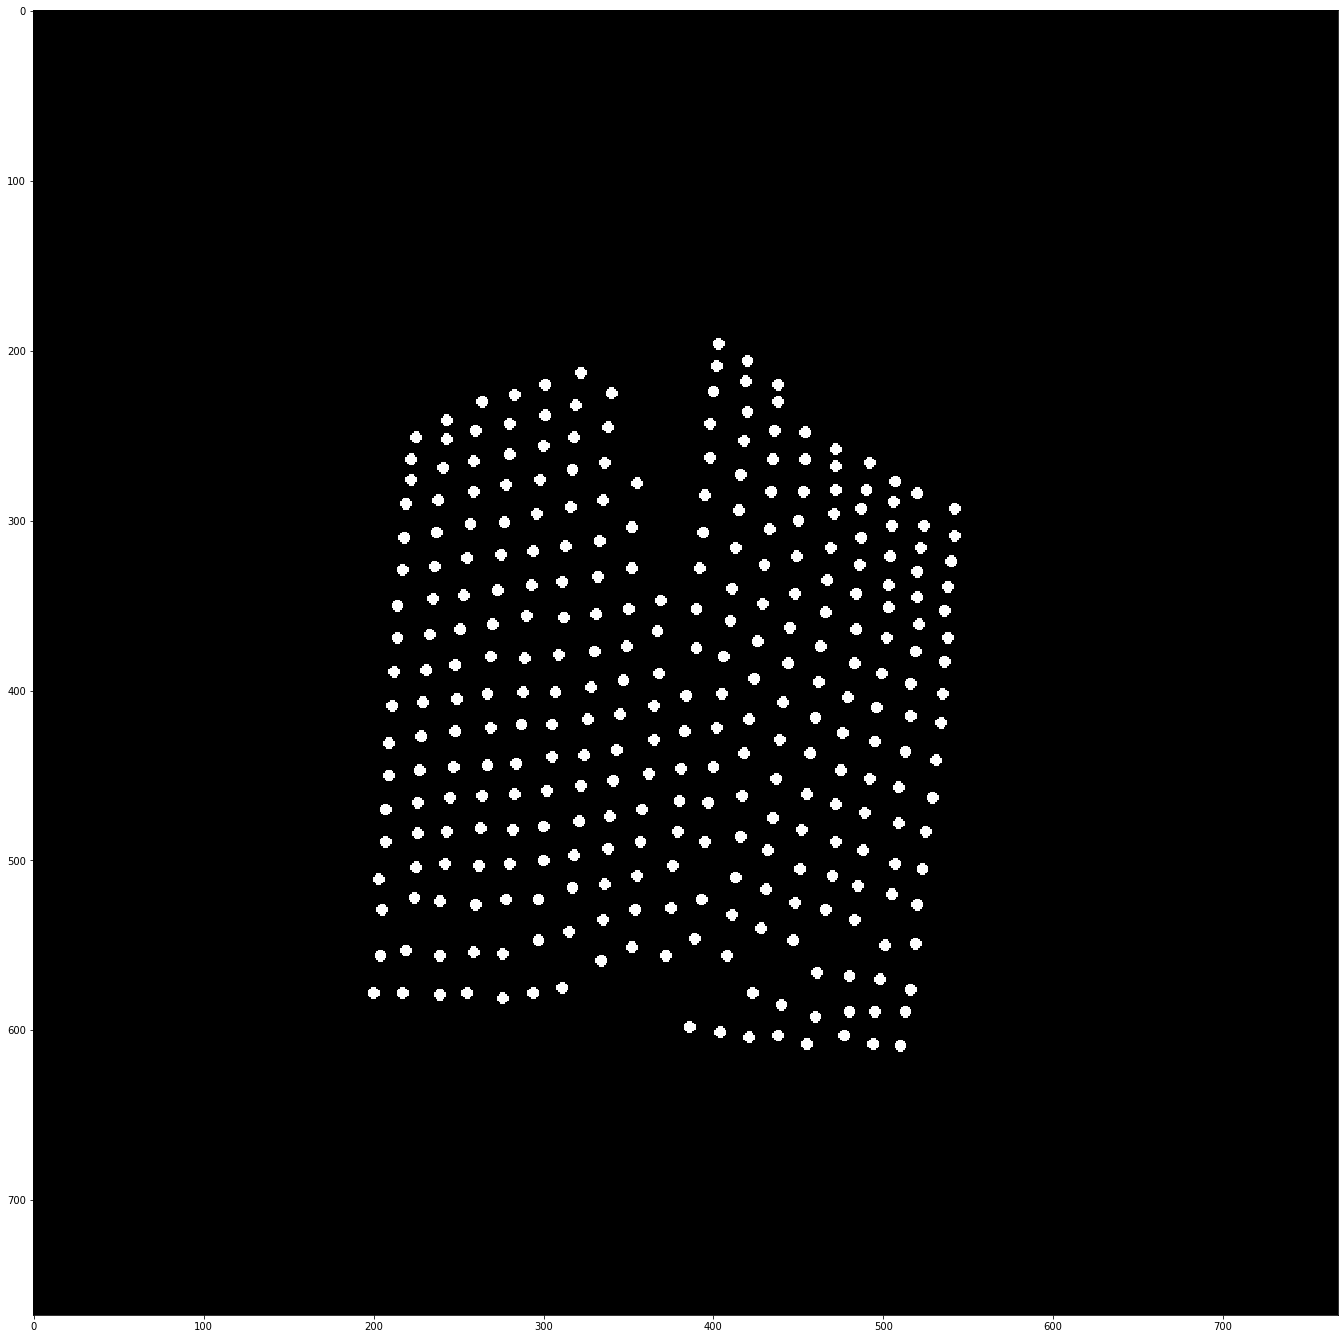

In [2]:
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/raw"
save_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/raw/extracted"

sources = ["KK2_gap0_Cam_16904_Cine2_0_19",
           "KK3_gap0_Cam_16904_Cine2_0_19",
           "KK4_gap0_Cam_16904_Cine2_0_19",
           "KK5_gap0_Cam_16904_Cine2_0_19",
           "KK9_gap0_Cam_16904_Cine2_0_19",
           "KK11_gap0_Cam_16904_Cine3_0_19",
           "KK16_gap0_Cam_16904_Cine2_0_19",
           "KK17_gap0_Cam_16904_Cine2_0_19",
           "KK18_gap0_Cam_16904_Cine2_0_19",
           "KK19_gap0_Cam_16904_Cine2_0_19",
           "KK20_gap0_Cam_16904_Cine2_0_19",
           "KK24_gap0_Cam_16904_Cine2_0_19"]

image_index = 0
image_index_2_roi_2_xy = dict()

for video in sources:
    video_path = os.path.join(base_dir, "{}.avi".format(video))
    rois_path = os.path.join(base_dir, "{}.rois".format(video))
    
    reader = imageio.get_reader(video_path)
    reader_list = list(reader)
    
    file = open(rois_path)
    roi_data = json.load(file)
    
    for frame, image in enumerate(reader):        
        save_path = os.path.join(save_dir, "{}.png".format(image_index))
        plt.imsave(save_path, image, cmap="gray")
    
        rois = roi_data["frames"][frame]["roi_positions"]
        roi_2_xy = dict()
        
        mask = np.zeros(image.shape)
        
        for roi in rois:
            if not roi['placed']:
                continue

            id = roi['id']
            x = roi['pos']['x']
            y = roi['pos']['y']
            
            x = int(round(roi['pos']['x'], 0))
            y = int(round(roi['pos']['y'], 0))
            
            roi_2_xy[id] = (x, y)
            mask[y][x] =  255
            
        mask = gaussian(mask,sigma=0.9)
        mask = (mask / mask.max()) * 255
        
        print(mask.max())
        mask = np.where(mask>0.1, 1.0, 0.0)
        
        plt.imshow(mask, cmap="gray")
        
        mask_path = os.path.join(save_dir, "{}_m.png".format(image_index))
        plt.imsave(mask_path, mask, cmap="gray")
        
        json_path = os.path.join(save_dir, "{}.json".format(image_index))
        json_file = json.dumps(roi_2_xy)

        f = open(json_path, "w")
        f.write(json_file)
        f.close() 
        file.close()
        
        image_index += 1

In [3]:
import random

In [4]:
shuffled_list = list(range(240))
print(shuffled_list)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [5]:
random.shuffle(shuffled_list)

In [6]:
print(shuffled_list)

[151, 165, 26, 192, 35, 116, 173, 64, 106, 104, 196, 109, 81, 48, 136, 43, 32, 190, 28, 19, 100, 143, 148, 24, 144, 139, 202, 73, 108, 183, 87, 3, 92, 110, 30, 204, 77, 223, 152, 239, 102, 234, 105, 182, 75, 56, 222, 66, 132, 114, 201, 195, 158, 217, 149, 98, 231, 31, 21, 238, 215, 29, 154, 79, 232, 187, 25, 147, 160, 162, 101, 7, 121, 72, 47, 141, 33, 118, 126, 140, 191, 212, 226, 131, 224, 205, 53, 2, 161, 170, 146, 123, 94, 11, 175, 219, 46, 115, 85, 127, 200, 10, 39, 8, 171, 99, 164, 138, 178, 4, 220, 90, 209, 6, 214, 34, 155, 49, 45, 63, 128, 62, 210, 184, 135, 216, 83, 80, 84, 0, 221, 236, 36, 179, 150, 5, 213, 70, 203, 125, 134, 58, 59, 157, 169, 1, 230, 153, 166, 111, 52, 227, 20, 44, 172, 122, 13, 199, 27, 142, 23, 86, 167, 124, 16, 18, 117, 176, 103, 50, 207, 89, 112, 185, 233, 82, 235, 78, 61, 186, 133, 137, 188, 12, 93, 225, 95, 198, 189, 15, 197, 38, 107, 97, 22, 76, 168, 229, 67, 41, 194, 91, 181, 40, 218, 120, 17, 37, 228, 208, 119, 159, 69, 55, 177, 74, 156, 129, 60, 88

In [7]:
train = shuffled_list[0:168] # 70 percent training

In [8]:
len(train)

168

In [9]:
validation = shuffled_list[168:204] # 15 percent training

In [10]:
len(validation)

36

In [11]:
test = shuffled_list[204:240] # 15 percent training

In [12]:
len(test)

36

In [13]:
import os

In [14]:
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN"

In [15]:
for index in train:
    save_sou = os.path.join(base_dir, "raw/extracted", "{}.png".format(index))
    mask_sou = os.path.join(base_dir, "raw/extracted", "{}_m.png".format(index))
    json_sou = os.path.join(base_dir, "raw/extracted", "{}.json".format(index))
    
    save_des = os.path.join(base_dir, "train", "{}.png".format(index))
    mask_des = os.path.join(base_dir, "train", "{}_m.png".format(index))
    json_des = os.path.join(base_dir, "train", "{}.json".format(index))
    
    os.rename(save_sou, save_des)
    os.rename(mask_sou, mask_des)
    os.rename(json_sou, json_des)

In [16]:
for index in validation:
    save_sou = os.path.join(base_dir, "raw/extracted", "{}.png".format(index))
    mask_sou = os.path.join(base_dir, "raw/extracted", "{}_m.png".format(index))
    json_sou = os.path.join(base_dir, "raw/extracted", "{}.json".format(index))
    
    save_des = os.path.join(base_dir, "validation", "{}.png".format(index))
    mask_des = os.path.join(base_dir, "validation", "{}_m.png".format(index))
    json_des = os.path.join(base_dir, "validation", "{}.json".format(index))
    
    os.rename(save_sou, save_des)
    os.rename(mask_sou, mask_des)
    os.rename(json_sou, json_des)

In [17]:
for index in test:
    save_sou = os.path.join(base_dir, "raw/extracted", "{}.png".format(index))
    mask_sou = os.path.join(base_dir, "raw/extracted", "{}_m.png".format(index))
    json_sou = os.path.join(base_dir, "raw/extracted", "{}.json".format(index))
    
    save_des = os.path.join(base_dir, "test", "{}.png".format(index))
    mask_des = os.path.join(base_dir, "test", "{}_m.png".format(index))
    json_des = os.path.join(base_dir, "test", "{}.json".format(index))
    
    os.rename(save_sou, save_des)
    os.rename(mask_sou, mask_des)
    os.rename(json_sou, json_des)

# CHECK IF extracted FOLDER IS EMPTY AND 168, 36 and 36 images are present

# Create fixed image and data

In [2]:
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN"

In [114]:
n_x = 18
n_y = 18

width = 768
height = 768

inner_part = 6.0
total_part = 8.0

spacing_x = (width * (inner_part/total_part)) / n_x
spacing_y = (height * (inner_part/total_part)) / n_y

base_offset_x = width / total_part
base_offset_y = height / total_part

offset_x = spacing_x / 2.0 + base_offset_x
offset_y = spacing_y / 2.0 + base_offset_y

In [115]:
def get_fixed_data(sample_index):  
    fixed = np.zeros((height, width))
    index_2_xy = dict()
    index = 0
    for index_y in reversed(range(n_y)):
        y = int(round(offset_y + (spacing_y * index_y)))

        for index_x in range(n_x):
            x = int(round(offset_x + (spacing_x * index_x)))
            
            fixed[y][x] = 1
            index_2_xy[index] = (x, y)
            
            index += 1
            
    return fixed, index_2_xy

In [117]:
fixed, index_2_xy = get_fixed_data(0)
fixed = utils.apply_smoothing(fixed, sigma=2, sigma_back=15)

save_des = os.path.join(base_dir, "train", "0_f")
plt.imsave(save_des + ".png", fixed, cmap='gray')

json_file = json.dumps(index_2_xy)
f = open(save_des + ".json", "w")
f.write(json_file)
f.close()

# Create moving image

In [2]:
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN"

In [3]:
width = 768
height = 768

In [6]:
data_set = "validation"

path = base_dir + "/" + data_set + "/*.json"
globs = glob(path)
globs = [int(path.split(os.sep)[-1].split(".")[0].split("_")[0]) for path in globs]
image_ids = sorted(globs)

for image_id in image_ids:
    data_path = base_dir + "/" + data_set + "/{}.json".format(image_id)
    with open(data_path) as data_file:
        data_json = json.load(data_file)
    
    moving = np.zeros((height, width))
    for key, value in data_json.items():
        moving[value[1]][value[0]] = 1
        
    moving = utils.apply_smoothing(moving, sigma=2, sigma_back=15)
    
    save_path = base_dir + "/" + data_set + "/" + "{}_mov.png".format(image_id)
    plt.imsave(save_path, moving, cmap='gray')

# Create LASTEN_10, LASTEN_25, LASTEN_50

In [5]:
base_dir = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN"

vals = [10, 25, 50]

for val in vals:
    read_dir = base_dir + "/train"
    write_dir = base_dir + "_{}/train".format(val)
    path = read_dir + "/*.json"
    
    used_ids = []
    
    globs = glob(path)
    globs = [int(path.split(os.sep)[-1].split(".")[0].split("_")[0]) for path in globs]
    image_ids = sorted(globs)
    
    random.shuffle(image_ids)
    
    n_data_points = val/100 * 320
    
    for i in range(int(n_data_points)):
        image_id = image_ids.pop()
        
        json_file_source = read_dir + "/{}.json".format(image_id)
        image_file_source = read_dir + "/{}_mov.png".format(image_id)
        
        json_file_destination = write_dir + "/{}.json".format(image_id)
        image_file_destination = write_dir + "/{}_mov.png".format(image_id)
        
        copyfile(json_file_source, json_file_destination)
        copyfile(image_file_source, image_file_destination)   